# CalcuViz: Interactive Calculus with Python

## Import required libraries

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output


## Input function

Input your function here. 

Use the following syntax :

`x² = x**2`

`2x == 2*x`

`x + 2 == x + 2`

In [7]:
func_input = "2*x**2 + 3*x + 1"

## Function definitions

Run this cell once to allow the environnment to grasp all functions.

In [31]:
def compute_derivative(func_str):
    x = sp.symbols('x')
    func = sp.sympify(func_str)
    derivative = sp.diff(func, x)
    return derivative

def plot_function(func_str, x_range=(-10, 10), y_range=(-10, 10), target_x_list=None):
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    func = lambda x: eval(func_str, {"x": x})

    # Calculate original function values
    y_vals = [func(x_val) for x_val in x_vals]

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals, label=f'f(x) = {func_str}')
    
    # Plot each target_x in target_x_list if provided
    if target_x_list:
        for target_x in target_x_list:
            y_target = func(target_x)
            plt.scatter([target_x], [y_target], color='red')  # plots the point
            plt.annotate(f'f({target_x}) = {y_target:.2f}', (target_x, y_target), textcoords="offset points", xytext=(0,10), ha='center')

    plt.ylim(y_range)  
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function Plot')
    plt.show()

def plot_derivative(func_str, x_range=(-10, 10), y_range=(-10, 10), target_x_list=None):
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    
    # Calculate derivative values
    derivative_str = str(compute_derivative(func_str))
    derivative_func = lambda x: eval(derivative_str, {"x": x})
    y_vals_derivative = [derivative_func(x_val) for x_val in x_vals]

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals_derivative, '--', label=f'f\'(x) = {derivative_str}')
    
    # Plot each target_x in target_x_list if provided
    if target_x_list:
        for target_x in target_x_list:
            y_target_derivative = derivative_func(target_x)
            plt.scatter([target_x], [y_target_derivative], color='red')  # plots the point
            plt.annotate(f'f\'({target_x}) = {y_target_derivative:.2f}', (target_x, y_target_derivative), textcoords="offset points", xytext=(0,10), ha='center')

    plt.ylim(y_range)  
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Derivative Plot')
    plt.show()

# Numerical Differentiation: Forward Difference Method
def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x)) / h

# Numerical Integration: Trapezoidal Rule
def numerical_integral(func, a, b, n=1000):
    h = (b - a) / n
    integral = 0.5 * (func(a) + func(b))
    for i in range(1, n):
        integral += func(a + i*h)
    integral *= h
    return integral


def visualize_integral(func_str, x_range=(-10, 10), integral_range=None):
    x = sp.symbols('x')
    func = sp.sympify(func_str)
    
    # Create the x values
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    lambdified_func = sp.lambdify(x, func, 'numpy')
    y_vals = lambdified_func(x_vals)
    
    # Plotting the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, 'b', label=f'f(x) = {func_str}')
    
    if integral_range:
        # Getting the area under the curve
        x_vals_fill = np.linspace(integral_range[0], integral_range[1], 400)
        y_vals_fill = lambdified_func(x_vals_fill)
        plt.fill_between(x_vals_fill, y_vals_fill, color='red', alpha=0.4, label='Area under curve')
        
        # Calculating the integral value
        definite_integral = sp.integrate(func, (x, integral_range[0], integral_range[1]))
        plt.title('Function and Area under Curve')
    else:
        plt.title('Function Plot')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f'Integral Value: {definite_integral.evalf()}')

def find_extrema(func_str, domain=(-sp.oo, sp.oo)):
    x = sp.symbols('x')
    func = sp.sympify(func_str)

    # First and second derivatives
    f_prime = sp.diff(func, x)
    f_double_prime = sp.diff(f_prime, x)

    # Critical points where first derivative is zero or undefined
    critical_points = sp.solve(f_prime, x)

    maxima = []
    minima = []
    inconclusive = []

    for point in critical_points:
        if domain[0] <= point <= domain[1]:
            # Evaluate the second derivative directly
            second_derivative_value = f_double_prime.subs(x, point)

            if second_derivative_value > 0:
                minima.append((point, func.subs(x, point)))
            elif second_derivative_value < 0:
                maxima.append((point, func.subs(x, point)))
            else:
                inconclusive.append((point, func.subs(x, point)))

    # Check endpoints
    for endpoint in domain:
        if endpoint != -sp.oo and endpoint != sp.oo:
            y_val = func.subs(x, endpoint)
            neighbors = [func.subs(x, endpoint - 0.001), func.subs(x, endpoint + 0.001)]

            if max(neighbors) < y_val:
                maxima.append((endpoint, y_val))
            elif min(neighbors) > y_val:
                minima.append((endpoint, y_val))
            else:
                inconclusive.append((endpoint, y_val))

    if not maxima and not minima:
        return "No clear maxima or minima found."

    return maxima, minima, inconclusive

def print_extrema(func_str, domain=(-sp.oo, sp.oo)):
    results = find_extrema(func_str, domain)
    
    # Check if a message was returned
    if isinstance(results, str):
        print(results)
        return

    maxima, minima, inconclusive = results
    
    # Print Maxima
    if maxima:
        print("Maxima:")
        for x_val, y_val in maxima:
            print(f"x = {x_val}, f(x) = {y_val}")
    else:
        print("No maxima found.")
    
    # Print Minima
    if minima:
        print("\nMinima:")
        for x_val, y_val in minima:
            print(f"x = {x_val}, f(x) = {y_val}")
    else:
        print("No minima found.")
    
    # Print Inconclusive points
    if inconclusive:
        print("\nInconclusive Points:")
        for x_val, y_val in inconclusive:
            print(f"x = {x_val}, f(x) = {y_val}")


## Operations

### Plotting Functions

Understanding the shape and behavior of a function is fundamental in mathematics and its applications. A visual representation can give immediate insights into a function's properties, such as its continuity, inflection points, and symmetry.

#### How to Use:

1. **Adjust the Ranges**: Set the `x_range` and `y_range` parameters to adjust the visible range on the graph.
2. **Evaluate Specific Points**: If you're interested in the function's value at certain x-values, provide them as a list to the `target_x_values` parameter. The plot will mark these points and display their corresponding y-values.

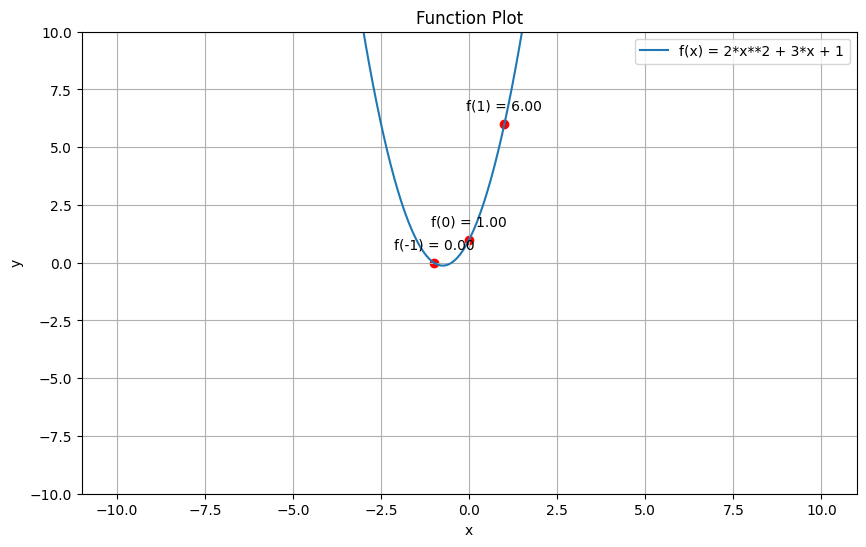

In [13]:
plot_function(func_input, x_range=(-10, 10), y_range=(-10, 10), target_x_list=[-1, 0, 1])



### Visualizing Derivatives

The derivative of a function portrays how it changes: where it increases or decreases, and where it has maxima or minima. By plotting a function and its derivative side by side, you can understand the relationship between a function and its rate of change.

#### How to Use:

1. **Define Your Function**: Input the mathematical expression of the function whose derivative you want to visualize.
2. **Set the Viewing Ranges**: Adjust the viewing window using the `x_range` and `y_range` parameters to focus on specific areas of interest.
3. **Target Specific X-values**: If you want to understand the derivative's value at particular x-values, provide them as a list. The tool will mark these points on both plots.



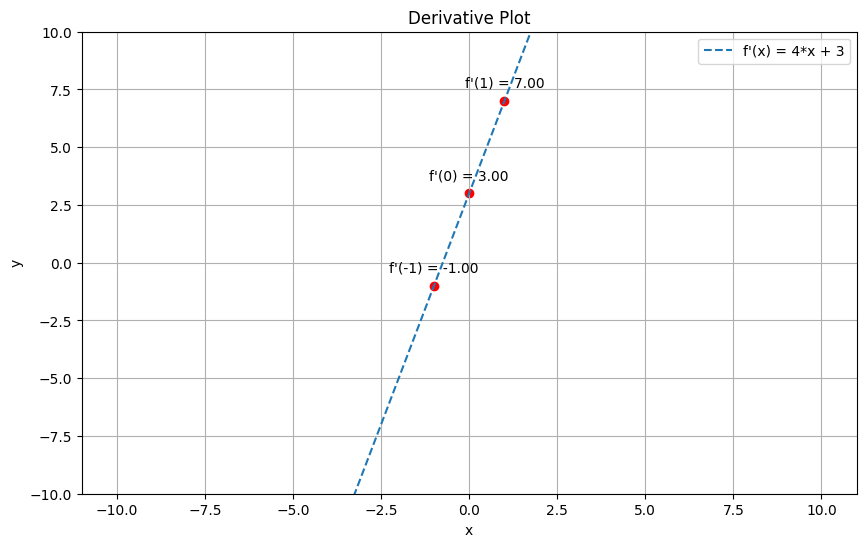

In [14]:
plot_derivative(func_input, x_range=(-10, 10), y_range=(-10, 10), target_x_list=[-1, 0, 1])

## Visualizing the integral

Integration is a powerful concept in calculus, representing the accumulation of quantities and the area under a function's curve. This visualization tool provides a tangible view of this concept, allowing you to see and understand the area represented by the integral of a given function.

#### How to Use:

1. **Set the X-Axis Range**: Adjust the `x_range` parameter to specify the range over which you want to visualize your function.

2. **Highlight Area under the Curve**: If you wish to shade the area under the curve for a particular range, set the `integral_range` parameter to the desired interval `(a, b)`. The tool will then highlight this area and calculate the definite integral value over this range.

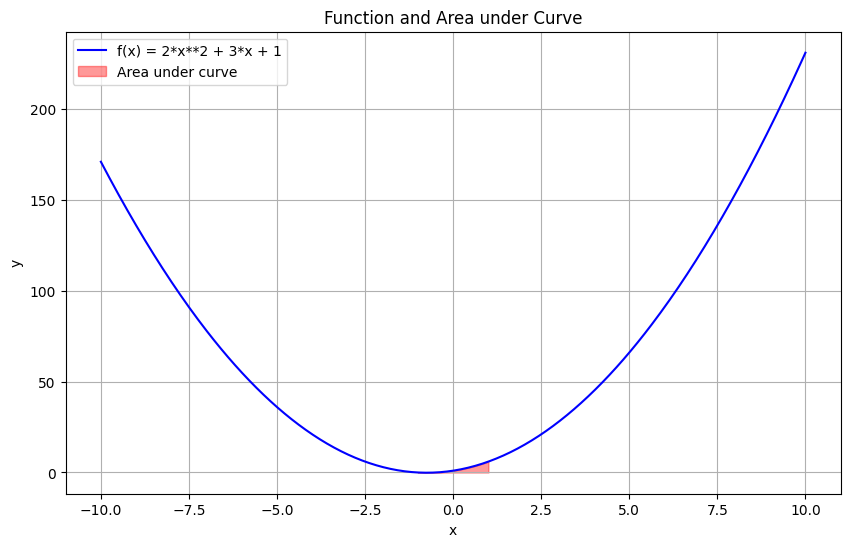

Integral Value: 3.33333333333333


In [26]:
visualize_integral(func_input, x_range=(-10, 10), integral_range=(-1, 1))

### Numerical approximations

#### Derivative approximation

To approximate the derivative of your function, you can use numerical differentiation. While symbolic differentiation gives you the exact formula for the derivative, numerical methods provide an approximate value of the derivative at specific points.

**Usage**:
1. Specify the `x` value at which you'd like to approximate the derivative.
2. Specify a small value for `h` (e.g., 0.01). The smaller the value, the more accurate the approximation, but be wary of making it too small due to computational limits.

In [28]:
print(numerical_derivative(lambda x: eval(func_input, {"x": x}), 0.01))

3.0400200000002537


#### Integral approximation

Numerical integration, or quadrature, is a method to approximate the definite integral of a function. Instead of finding the exact area under the curve, numerical integration provides an estimate based on specific methods like the Trapezoidal or Simpson's rule.

**Usage**:
1. Specify the interval `[a, b]` over which you want to approximate the integral.
2. Choose the method and number of subdivisions or points for the approximation.

In [18]:
print(numerical_integral(lambda x: eval(func_input, {"x": x}), 0, 1))

3.1666669999999955


### Finding Local Maxima and Minima

In calculus, local maxima and minima (collectively referred to as extrema) are points where a function achieves a highest or lowest value, respectively, in a neighborhood around that point. These points can offer critical insights in various fields, ranging from business to engineering.

#### How to Use:

1. **Execute the Code**: Run the function to determine the local maxima and minima.
2. **Interpret the Results**: The function will return lists of points representing the local maxima and minima.

This process can help in optimization problems, such as determining the best price to charge for a product or optimizing engineering designs.


In [33]:
print_extrema(func_input, domain=(-sp.oo, sp.oo))

Maxima:
x = 2, f(x) = 48

Minima:
x = -2, f(x) = -80
x = 3, f(x) = 45
